In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=["Geography","Gender"], drop_first=True, dtype=int) #converting string data to int data by using one hot encoding

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
# splitting the data into X and y and creating X_train, X_test, y_train and y_test

X = df.drop(columns=["Exited"])
y = df["Exited"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [16]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [17]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [18]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [19]:
#scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [22]:
#import libraries for building neural network

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-05-29 13:25:22.445878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 13:25:22.446005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 13:25:22.614850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim=11)) #this means in the starting layer we will add 11 perceptrons in this input layer and we mention the number of inputs as well.
model.add(Dense(11, activation="relu")) #layer 2 with 11 perceptrons
model.add(Dense(1, activation="sigmoid")) #output layer will have 1 perceptron.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6544 - loss: 0.6400 - val_accuracy: 0.8006 - val_loss: 0.4917
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4707 - val_accuracy: 0.8112 - val_loss: 0.4516
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4371 - val_accuracy: 0.8138 - val_loss: 0.4399
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.4363 - val_accuracy: 0.8181 - val_loss: 0.4311
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 0.4267 - val_accuracy: 0.8169 - val_loss: 0.4215
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4043 - val_accuracy: 0.8231 - val_loss: 0.4115
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8359 - loss: 0.3968 - val_accuracy: 0.8238 - val_loss: 0.4012
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.3930 - val_accu

history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

In [27]:
model.layers[0].get_weights()

[array([[ 0.04525862, -0.02452884, -0.24151546, -0.31233647, -0.03452296,
          0.29311982, -0.09551882, -0.465105  , -0.17993921, -0.02610819,
         -0.0217115 ],
        [-0.58598787, -0.33385065,  0.36703095,  0.50280505,  0.57222974,
          0.28584108,  0.5972845 , -0.63070655, -0.61714023,  1.1431742 ,
         -0.1540775 ],
        [-0.1939819 ,  0.23111482,  0.0314952 , -0.14216617, -0.19464757,
         -0.06682858,  0.21514693,  0.08073327,  0.26921377, -0.17635305,
         -0.04610164],
        [-0.13057533, -0.1708645 , -1.3215833 , -0.44264093,  0.45290083,
         -0.22188058, -0.10329304,  0.5863434 , -0.5362351 , -0.12516916,
         -0.5161084 ],
        [ 0.01369847,  1.4013941 ,  0.15054674, -0.21462765, -1.3339419 ,
         -0.19324966, -0.31760955,  0.44178122,  0.01493274,  0.6479803 ,
         -1.1985425 ],
        [-0.06947863,  0.01346753, -0.34494308,  0.32072842, -0.05627266,
          0.10388152,  0.04965071, -0.08551952,  0.2613947 ,  0.0514163

In [28]:
model.layers[1].get_weights()

[array([[ 4.19985652e-01,  5.24185836e-01,  3.59553516e-01,
         -1.51825562e-01,  1.49706369e-02, -3.21932584e-01,
         -3.98720115e-01,  3.08784664e-01, -7.88979650e-01,
          6.20033920e-01, -3.35676432e-01],
        [ 8.36159289e-02,  2.03199074e-01,  3.30128014e-01,
          1.67047903e-01,  4.40346241e-01,  8.80593956e-01,
         -4.98246580e-01,  2.73182571e-01,  1.87717617e-01,
         -4.04007077e-01, -4.93666887e-01],
        [ 1.80922281e-02,  2.38000125e-01,  4.10843164e-01,
          5.93840837e-01,  4.73437518e-01, -4.39082086e-01,
          5.27408183e-01, -1.87917247e-01,  5.72289631e-04,
          5.77196553e-02,  4.68309402e-01],
        [-2.30338573e-01, -3.49201620e-01, -5.89210927e-01,
         -1.34029731e-01, -2.70406753e-01,  3.92951220e-01,
          2.36680731e-01,  2.37222552e-01, -3.18228334e-01,
          4.98585522e-01,  3.08007389e-01],
        [-5.33880591e-02,  1.32951308e-02, -6.52182251e-02,
         -6.99166209e-03,  7.36618936e-01,  

In [29]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
y_log

array([[0.02109709],
       [0.06060088],
       [0.02665536],
       ...,
       [0.00442545],
       [0.03348817],
       [0.36197975]], dtype=float32)

In [31]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [32]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.864

In [34]:
import matplotlib.pyplot as plt

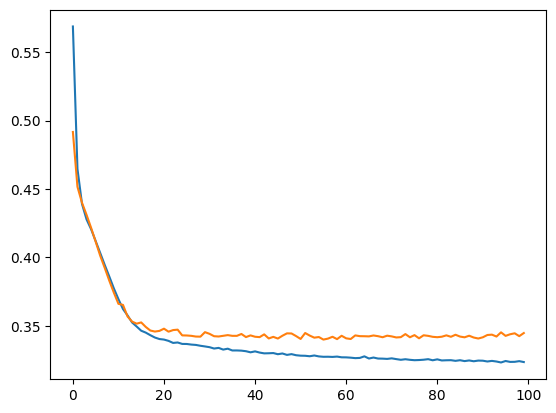

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

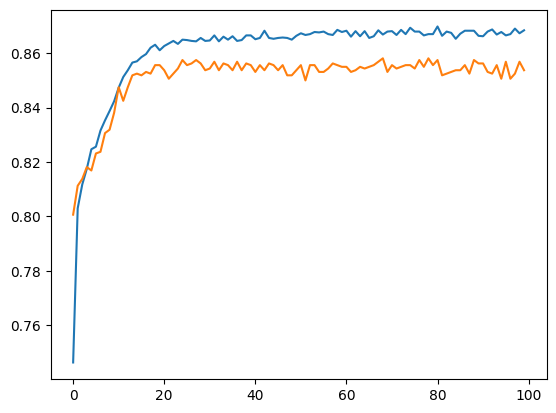

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])